In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
data.replace("Yes", 1, inplace = True)
data.replace("No", 0, inplace = True)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


In [4]:
data['Diabetic'].unique()

array([1, 0, 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [5]:
data.replace("Yes (during pregnancy)", 1, inplace = True)
data.replace("No, borderline diabetes", 0, inplace = True)

In [6]:
data["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [7]:
data.replace("Female", 1, inplace = True)
data.replace("Male", 0, inplace = True)

In [8]:
data["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [9]:
data.replace("18-24", 0, inplace = True)
data.replace("25-29", 1, inplace = True)
data.replace("30-34", 2, inplace = True)
data.replace("35-39", 3, inplace = True)
data.replace("40-44", 4, inplace = True)
data.replace("45-49", 5, inplace = True)
data.replace("50-54", 6, inplace = True)
data.replace("55-59", 7, inplace = True)
data.replace("60-64", 8, inplace = True)
data.replace("65-69", 9, inplace = True)
data.replace("70-74", 10, inplace = True)
data.replace("75-79", 11, inplace = True)
data.replace("80 or older", 12, inplace = True)

In [10]:
data["Race"].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [11]:
data.replace("White", 0, inplace = True)
data.replace("Black", 1, inplace = True)
data.replace("Asian", 2, inplace = True)
data.replace("American Indian/Alaskan Native", 3, inplace = True)
data.replace("Hispanic", 4, inplace = True)
data.replace("Other", 5, inplace = True)

In [12]:
data["GenHealth"].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [13]:
data.replace("Poor", 0, inplace = True)
data.replace("Fair", 1, inplace = True)
data.replace("Good", 2, inplace = True)
data.replace("Very good", 3, inplace = True)
data.replace("Excellent", 4, inplace = True)

In [14]:
data.shape

(319795, 18)

In [15]:
#70% train, 30% test

319795 * 0.7

223856.5

In [16]:
train = data.iloc[:223856, :]
test = data.iloc[223856:, :]

<AxesSubplot:>

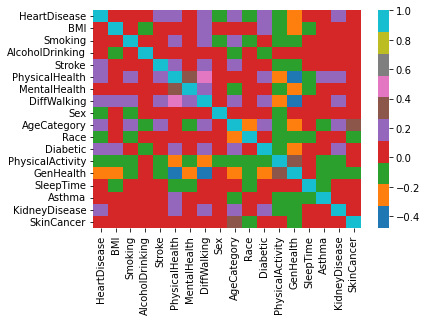

In [17]:
sns.heatmap(train.corr(), cmap='tab10')

In [18]:
train.corr().loc["HeartDisease", :]

HeartDisease        1.000000
BMI                 0.051816
Smoking             0.108089
AlcoholDrinking    -0.030670
Stroke              0.196633
PhysicalHealth      0.167607
MentalHealth        0.027049
DiffWalking         0.201167
Sex                -0.070926
AgeCategory         0.233795
Race               -0.040265
Diabetic            0.177459
PhysicalActivity   -0.099053
GenHealth          -0.243695
SleepTime           0.012958
Asthma              0.040076
KidneyDisease       0.145019
SkinCancer          0.094440
Name: HeartDisease, dtype: float64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

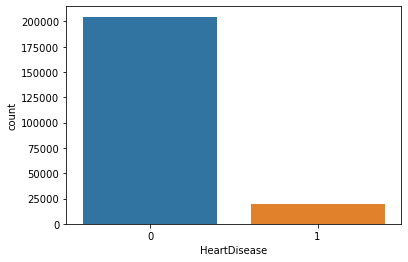

In [19]:
sns.countplot(x='HeartDisease',data=train)

<AxesSubplot:xlabel='PhysicalHealth', ylabel='count'>

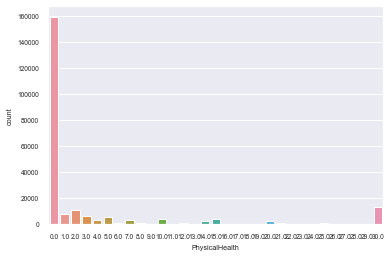

In [20]:
sns.set(font_scale = 0.6)
sns.countplot(x='PhysicalHealth',data=train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

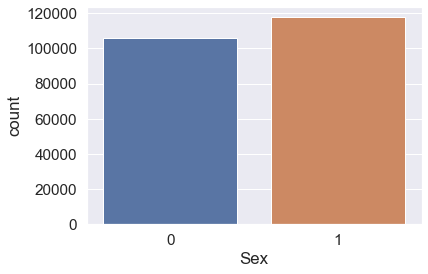

In [21]:
sns.set(font_scale = 1.4)
sns.countplot(x='Sex',data=train)

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

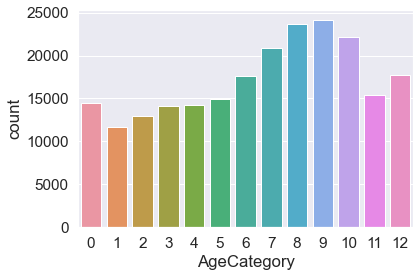

In [22]:
sns.countplot(x='AgeCategory',data=train)

# Variable Selection

In [23]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time

In [24]:
train

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,7,0,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,12,0,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,0,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,4,0,0,1,3,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223851,0,34.28,1,0,1,30.0,10.0,1,1,8,0,1,0,1,4.0,1,0,0
223852,0,24.80,0,0,0,0.0,0.0,0,1,5,0,0,1,3,8.0,0,0,0
223853,0,25.75,0,0,0,0.0,0.0,0,1,8,0,0,1,3,8.0,1,0,0
223854,1,23.91,1,0,0,18.0,0.0,1,0,9,3,1,0,1,5.0,1,0,0


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223856 entries, 0 to 223855
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      223856 non-null  int64  
 1   BMI               223856 non-null  float64
 2   Smoking           223856 non-null  int64  
 3   AlcoholDrinking   223856 non-null  int64  
 4   Stroke            223856 non-null  int64  
 5   PhysicalHealth    223856 non-null  float64
 6   MentalHealth      223856 non-null  float64
 7   DiffWalking       223856 non-null  int64  
 8   Sex               223856 non-null  int64  
 9   AgeCategory       223856 non-null  int64  
 10  Race              223856 non-null  int64  
 11  Diabetic          223856 non-null  int64  
 12  PhysicalActivity  223856 non-null  int64  
 13  GenHealth         223856 non-null  int64  
 14  SleepTime         223856 non-null  float64
 15  Asthma            223856 non-null  int64  
 16  KidneyDisease     22

In [63]:
X = train[['BMI', 'Smoking', 'AlcoholDrinking', "Stroke", 'PhysicalHealth', "MentalHealth", "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity", "GenHealth", "SleepTime", "Asthma", "KidneyDisease", "SkinCancer"]]





In [64]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.logit('HeartDisease~' + '+'.join(predictor_subset),data = train).fit()
    llr_pvalue = model.llr_pvalue
    return {"model":model, "llr_pvalue":llr_pvalue}

In [65]:
#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['llr_pvalue'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [66]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['llr_pvalue'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [67]:
def forward_selection():
    models_best = pd.DataFrame(columns=["llr_pvalue", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [68]:
models_best = forward_selection()

Optimization terminated successfully.
         Current function value: 0.291337
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.286852
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292066
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280690
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.282030
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292251
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.277014
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.290079
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.260826
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.291705
  

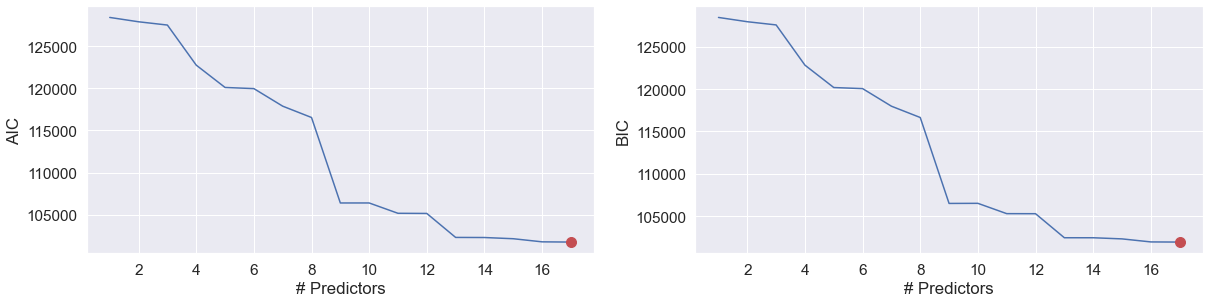

In [69]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    llr_pvalue = models_best.apply(lambda row: row[1].llr_pvalue, axis=1)

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 1)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

             feature        VIF
0              const  79.972059
1                BMI   1.113634
2            Smoking   1.079370
3    AlcoholDrinking   1.025452
4             Stroke   1.058532
5     PhysicalHealth   1.482908
6       MentalHealth   1.193096
7        DiffWalking   1.428001
8                Sex   1.040736
9        AgeCategory   1.341544
10              Race   1.059799
11          Diabetic   1.153540
12  PhysicalActivity   1.146034
13         GenHealth   1.588491
14         SleepTime   1.028896
15            Asthma   1.045201
16     KidneyDisease   1.059451
17        SkinCancer   1.085226


In [72]:
best_fwd_reg_model = models_best['model'][17]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               223856
Model:                          Logit   Df Residuals:                   223838
Method:                           MLE   Df Model:                           17
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                  0.2236
Time:                        12:26:09   Log-Likelihood:                -50852.
converged:                       True   LL-Null:                       -65500.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.7942      0.074    -51.004      0.000      -3.940      -3.648
Smoking              0.3686      0.017     21.556      0.000       0.335       0.402
BMI                  0.0098      0.001      7.257      0.000       0.007       0.012
AlcoholDrinking     -0.1827      0.039     -4.653      0.000      -0.260      -0.106
Stroke               1.0430      0.027     38.687      0.000       0.990       1.096
PhysicalHealth       0.0017      0.001      1.663      0.096      -0.000       0.004
MentalHealth         0.0048      0.001      4.467      0.000       0.003       0.007
DiffWalking          0.2187      0.022     10.136      0.000       0.176       0.261
Sex                 -0.7298      0.017    -42.105      0.000      -0.764      -0.696
AgeCategory          0.2753      0.004     75.282      0.000       0.268       0.282
Race                -0.0372      0.007     -5.294      0.000      -0.051      -0.023
Diabetic             0.4900      0.020     25.012      0.000       0.452       0.528
PhysicalActivity     0.0366      0.019      1.903      0.057      -0.001       0.074
GenHealth           -0.5029      0.010    -49.761      0.000      -0.523      -0.483
SleepTime           -0.0184      0.005     -3.575      0.000      -0.029      -0.008
Asthma               0.2721      0.023     11.706      0.000       0.227       0.318
KidneyDisease        0.5708      0.029     19.536      0.000       0.514       0.628
SkinCancer           0.1250      0.023      5.427      0.000       0.080       0.170
====================================================================================
"""

# Confusion Matrix

In [73]:
pred = best_fwd_reg_model.predict(train)

In [74]:
from sklearn.metrics import roc_curve, auc
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))
    return pred_values

Classification accuracy = 91.6%
Precision = 59.3%
TPR or Recall = 6.0%
FNR = 94.0%
FPR = 0.4%
ROC-AUC = 84.2%


0         0.069466
1         0.170967
2         0.410225
3         0.095408
4         0.010513
            ...   
223851    0.482003
223852    0.010734
223853    0.031792
223854    0.399073
223855    0.031357
Length: 223856, dtype: float64

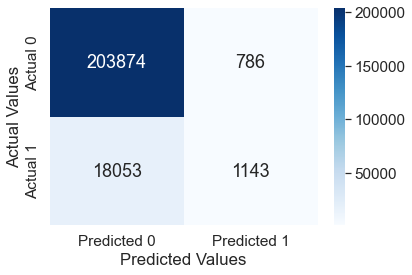

In [127]:
confusion_matrix_data(train,train.HeartDisease,best_fwd_reg_model,0.6)

In [119]:
model3 = sm.logit(formula = 'HeartDisease~BMI+Smoking+AlcoholDrinking+Stroke+PhysicalHealth+PhysicalActivity+MentalHealth+DiffWalking+Sex+AgeCategory+Race+Diabetic*GenHealth*SleepTime+Asthma+KidneyDisease+SkinCancer', data = train).fit()




Optimization terminated successfully.
         Current function value: 0.227066
         Iterations 8


Classification accuracy = 91.6%
Precision = 58.7%
TPR or Recall = 5.6%
FNR = 94.4%
FPR = 0.4%
ROC-AUC = 84.2%


0         0.082054
1         0.166089
2         0.397559
3         0.094199
4         0.010617
            ...   
223851    0.475632
223852    0.010732
223853    0.031628
223854    0.389885
223855    0.033285
Length: 223856, dtype: float64

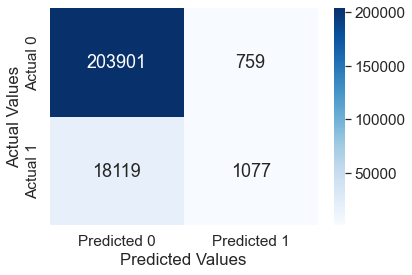

In [120]:
confusion_matrix_data(train,train.HeartDisease,model3,0.6)